# Title : Analyzing Sales Data from Multiple File Formats

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv("./datasets/sales_data_sample.csv", encoding="cp1252")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
df.isna().count()

ORDERNUMBER         2823
QUANTITYORDERED     2823
PRICEEACH           2823
ORDERLINENUMBER     2823
SALES               2823
ORDERDATE           2823
STATUS              2823
QTR_ID              2823
MONTH_ID            2823
YEAR_ID             2823
PRODUCTLINE         2823
MSRP                2823
PRODUCTCODE         2823
CUSTOMERNAME        2823
PHONE               2823
ADDRESSLINE1        2823
ADDRESSLINE2        2823
CITY                2823
STATE               2823
POSTALCODE          2823
COUNTRY             2823
TERRITORY           2823
CONTACTLASTNAME     2823
CONTACTFIRSTNAME    2823
DEALSIZE            2823
dtype: int64

In [8]:
categorical_col=df.select_dtypes(['category','object']).columns
categorical_col

Index(['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
num_col = df.select_dtypes(include='number').columns
num_col


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')

In [10]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [11]:
# df.dropna(inplace=True)

In [12]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [13]:
df = df.drop_duplicates()


In [14]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [15]:
df[num_col] = df[num_col].apply(lambda x: x.astype(int) if x.dtype == 'float64' else x)
df[num_col].dtypes
df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH            int32
ORDERLINENUMBER      int64
SALES                int32
ORDERDATE           object
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
PHONE               object
ADDRESSLINE1        object
ADDRESSLINE2        object
CITY                object
STATE               object
POSTALCODE          object
COUNTRY             object
TERRITORY           object
CONTACTLASTNAME     object
CONTACTFIRSTNAME    object
DEALSIZE            object
dtype: object

In [16]:
#  5. Perform data transformation tasks, such as merging multiple datasets, splitting 
# columns, or deriving new variables. 
# df['Total Amount']=df['PRICEEACH']*df['QUANTITYORDERED']
df['ORDERDATE'] = df['ORDERDATE'].apply(lambda x: x.split(" ")[0])
df.groupby(['COUNTRY','ORDERDATE', 'CITY', 'DEALSIZE']).agg({'SALES': 'sum'})


SALES
COUNTRY   ORDERDATE  CITY         DEALSIZE       
Australia 1/20/2005  North Sydney Large      8470
                                  Medium    11020
                                  Small     10359
          11/21/2003 Glen Waverly Medium    14564
                                  Small     23306
...                                           ...
USA       9/7/2004   Brickhaven   Medium     5171
                                  Small      2501
          9/8/2004   NYC          Large      7140
                                  Medium    17897
                                  Small     14732

[696 rows x 1 columns]

In [17]:
# 6.Analyze the sales data by performing descriptive statistics, aggregating data by 
# specific variables, or calculating metrics such as total sales, average order value, or 
# product category distribution. 
total_sales = df['SALES'].sum()
print(f'Total Sales: {total_sales}')

total_orders = df['ORDERNUMBER'].nunique()  # Number of unique orders
aov = total_sales / total_orders
print(f'Average Order Value (AOV): {aov}')


Total Sales: 10031309
Average Order Value (AOV): 32675.27361563518


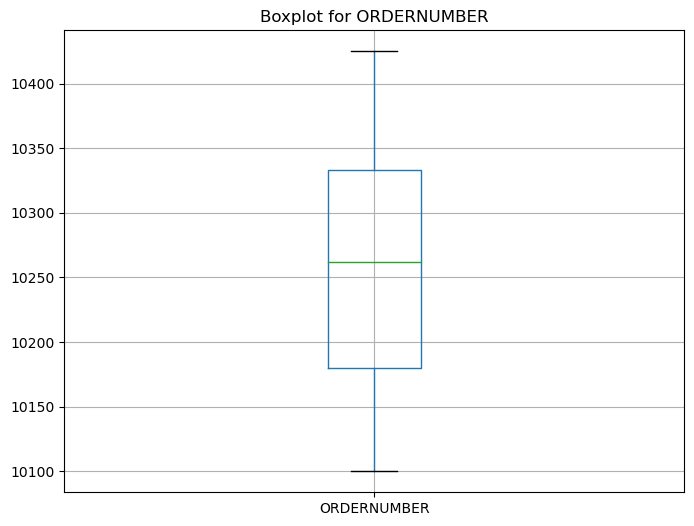

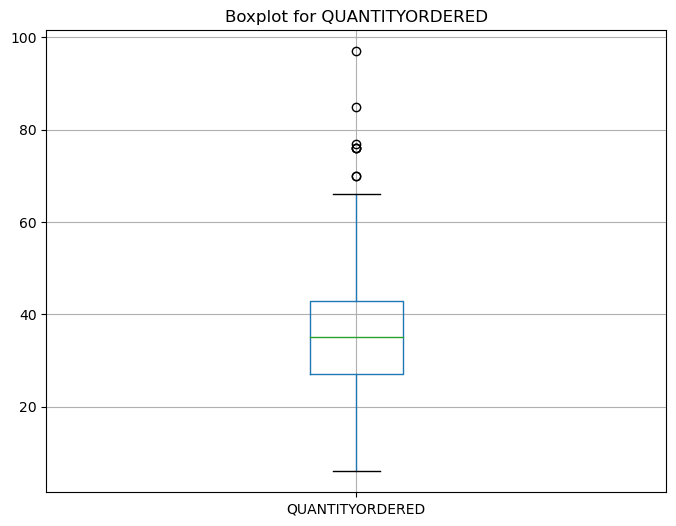

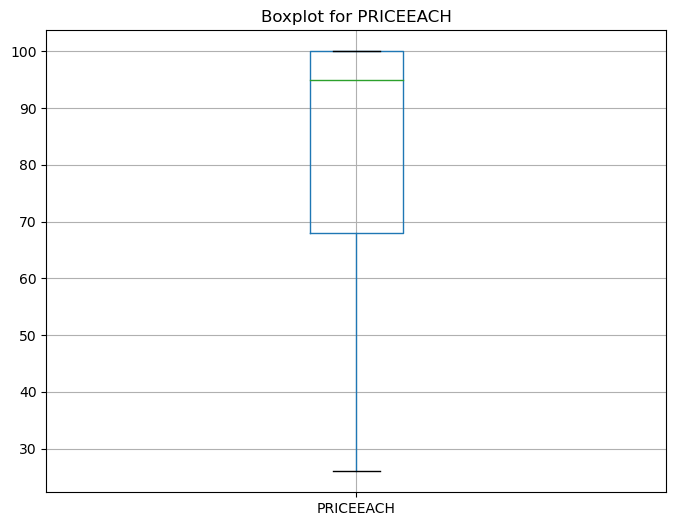

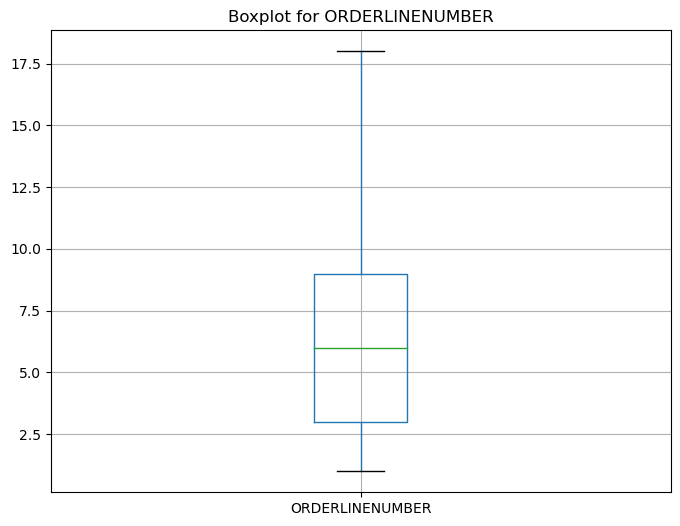

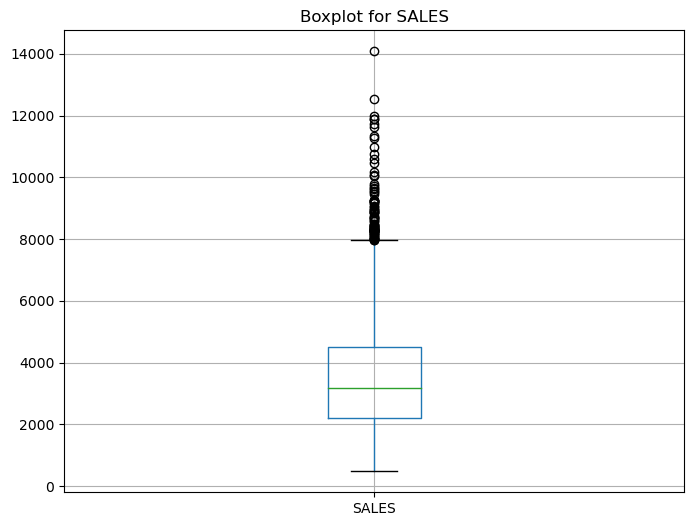

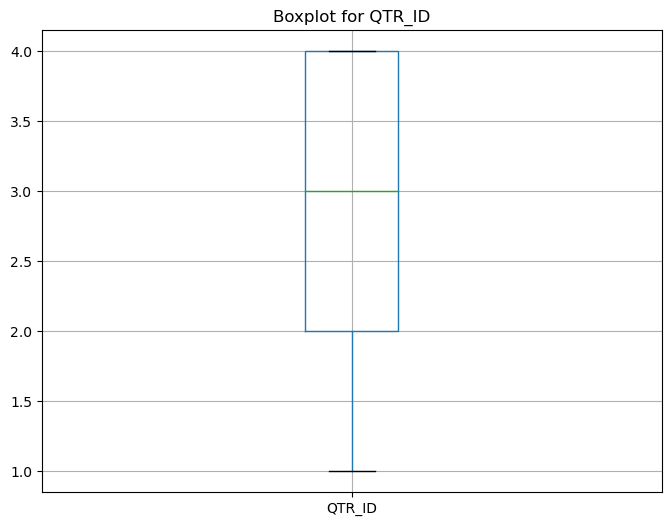

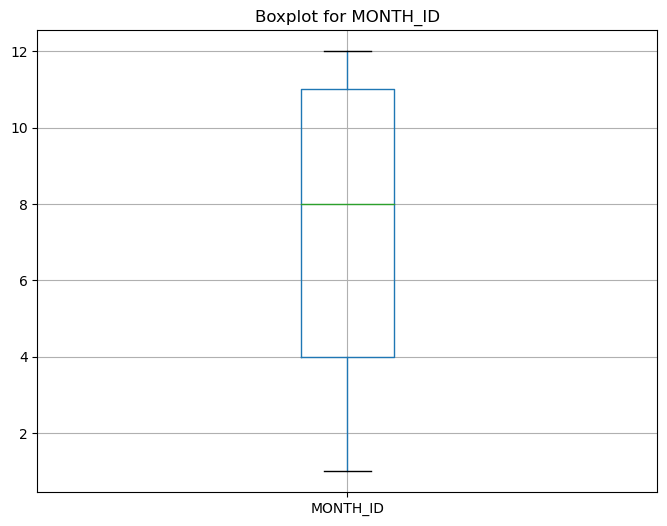

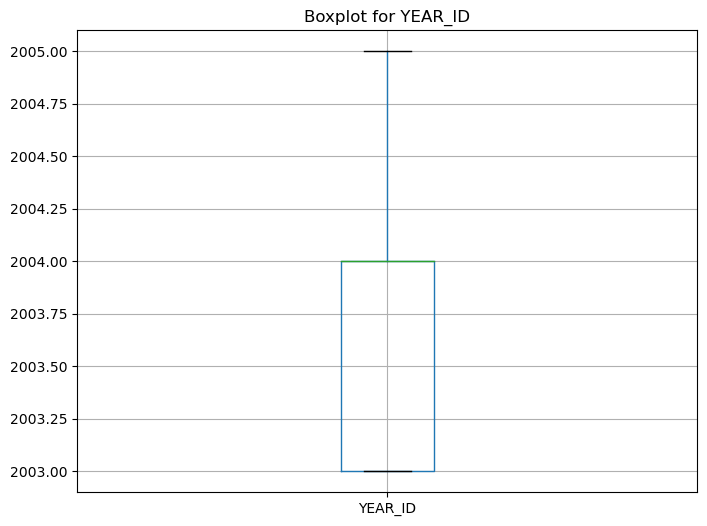

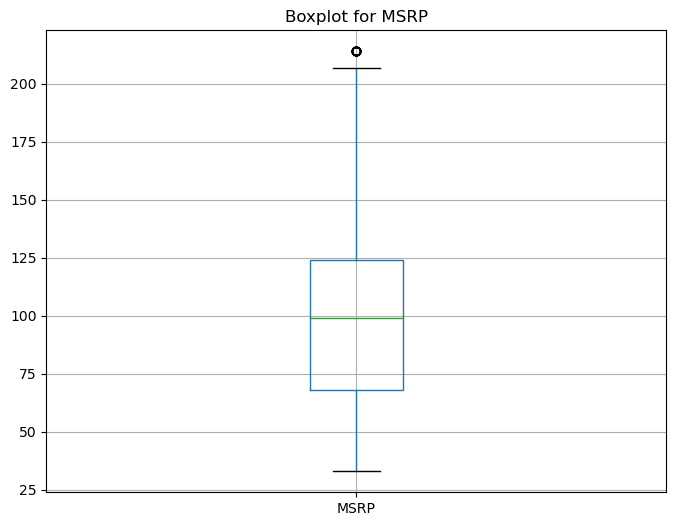

In [18]:
# plt.figure(())
for i in num_col:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

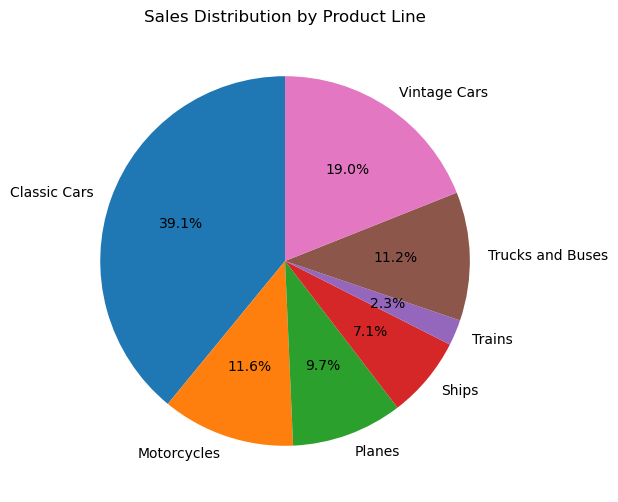

In [19]:
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum()
plt.figure(figsize=(8, 6))
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Product Line')
plt.show()

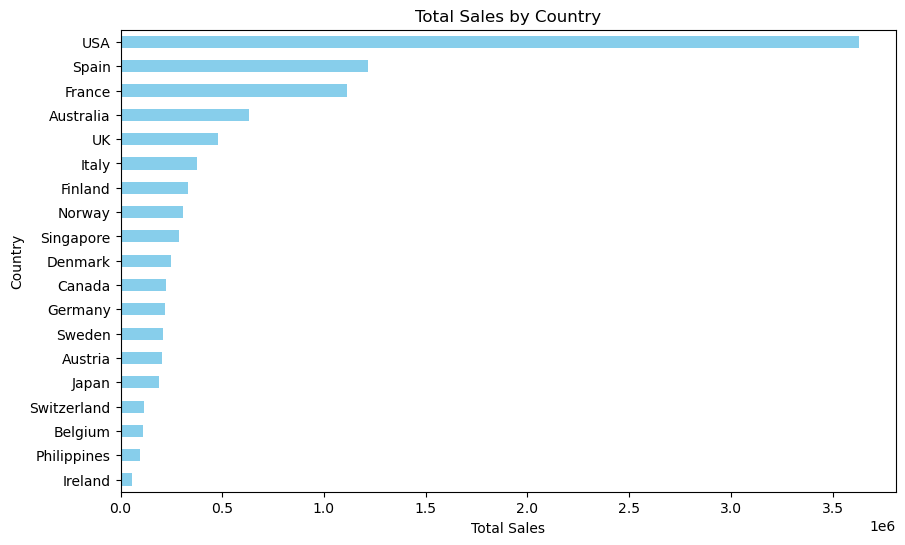

In [20]:
# Bar Plot: Total Sales by Country
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values()

plt.figure(figsize=(10, 6))
country_sales.plot(kind='barh', color='skyblue')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()

In [21]:
sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].sum()
print(sales_by_dealsize)


DEALSIZE
Large     1302048
Medium    6086783
Small     2642478
Name: SALES, dtype: int32


In [22]:
# 4. Convert the data into a unified format, such as a common dataframe or data structure, 
# to enable seamless analysis. 

unified_data = pd.concat([csv, ed], ignore_index=True)
unified_data.dropna()

NameError: name 'csv' is not defined